# CREDIT CARD FRAUD DETECTION

## Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from xgboost import XGBClassifier

## Exploratory Data Analysis (EDA)

In [2]:
dataset=pd.read_csv("./creditcard.csv")
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Checking for any missing values

In [3]:
dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
dataset.isnull().values.any()

False

### Checking for duplicate rows

In [5]:
dataset.duplicated()
dataset.shape

(284807, 31)

In [6]:
dataset.drop_duplicates(inplace=True)
dataset.shape

(283726, 31)

### Checking info of dataset

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

### Checking statistical of the features

In [8]:
dataset.drop("Class",axis=1).describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000


### Distribution of the features

In [9]:
data=dataset.drop("Class",axis=1)
data.median()
data.mean()
data.mode()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,3767.0,1.245674,-0.326668,-2.752041,-0.842316,-0.562777,-1.011073,-0.432126,-0.160211,0.170362,...,-0.18037,-0.262581,-0.816264,0.020675,0.357827,0.186423,-0.398828,-0.035866,-0.060282,1.0
1,NaN,2.055797,0.166975,0.488306,0.635322,2.463072,3.173856,0.014953,0.727706,0.608606,...,-0.13208,0.269765,0.844627,0.140304,0.726212,0.366624,0.096544,0.027735,0.018495,NaN


In [10]:
pd.DataFrame({"Median":data.median(),"Mean":data.mean(),"Mode1":data.mode().iloc[0],"Mode2":data.mode().iloc[1]})

,Median,Mean,Mode1,Mode2
Time,84692.500000,94811.077600,3767.000000,NaN
V1,0.020384,0.005917,1.245674,2.055797
V2,0.063949,-0.004135,-0.326668,0.166975
V3,0.179963,0.001613,-2.752041,0.488306
V4,-0.022248,-0.002966,-0.842316,0.635322
V5,-0.053468,0.001828,-0.562777,2.463072
V6,-0.275168,-0.001139,-1.011073,3.173856
V7,0.040859,0.001801,-0.432126,0.014953
V8,0.021898,-0.000854,-0.160211,0.727706
V9,-0.052596,-0.001596,0.170362,0.608606


In [11]:
columns=dataset.columns
columns_dist=columns.drop("Class")

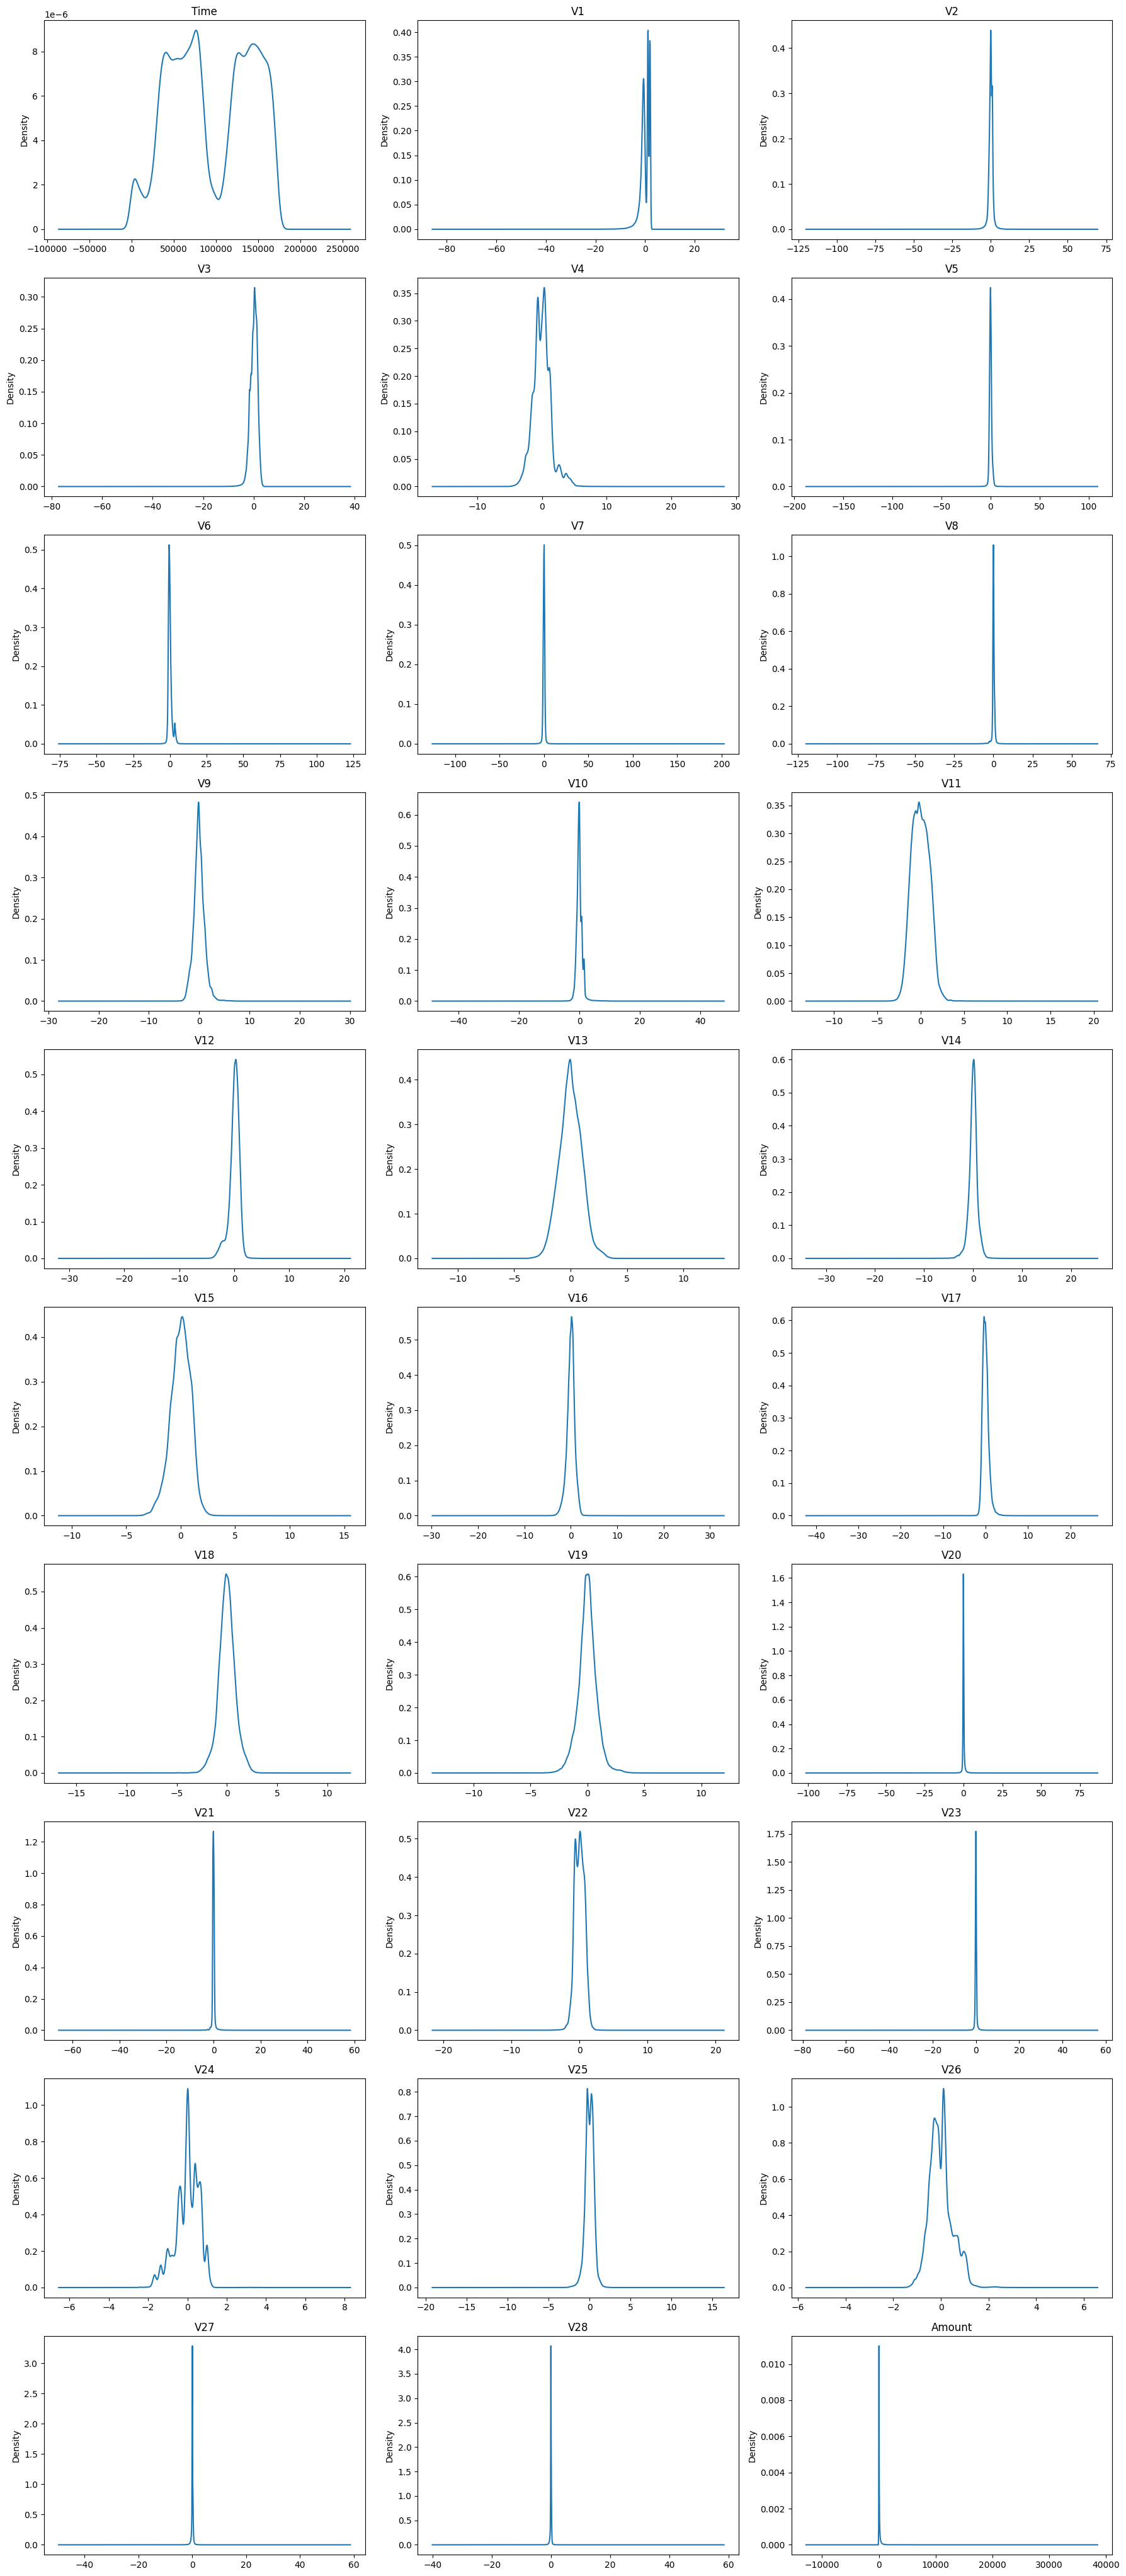

In [12]:
import math
fig, ax = plt.subplots(nrows=math.ceil(len(columns_dist)/3), ncols=3, figsize=(18,4*len(dataset.columns)//3))

for i, column in enumerate(columns_dist):
    dataset[column].plot(kind='kde', ax=ax[i//3][i%3])
    ax[i//3][i%3].set_title(column)
plt.tight_layout()
plt.show()

### Correlation matrix

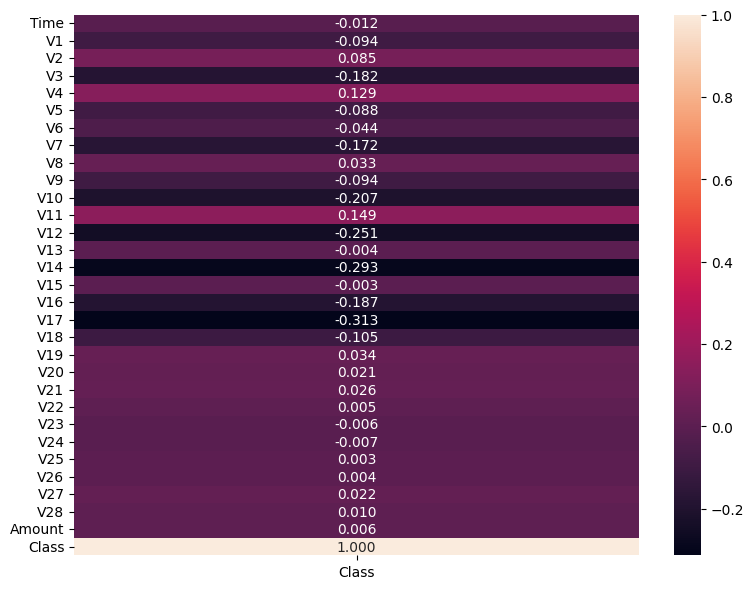

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(dataset.corr(method="pearson")[["Class"]],annot=True,fmt=".3f")
plt.tight_layout()

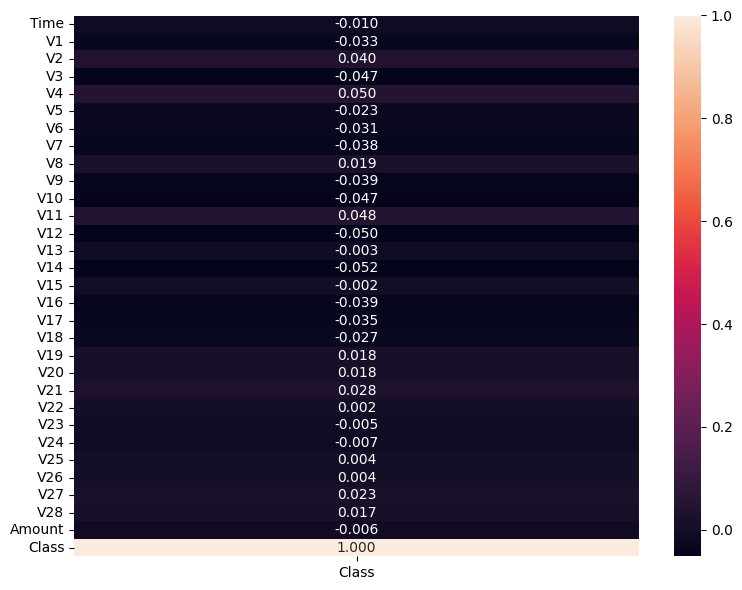

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(dataset.corr(method="kendall")[["Class"]],annot=True,fmt=".3f")
plt.tight_layout()

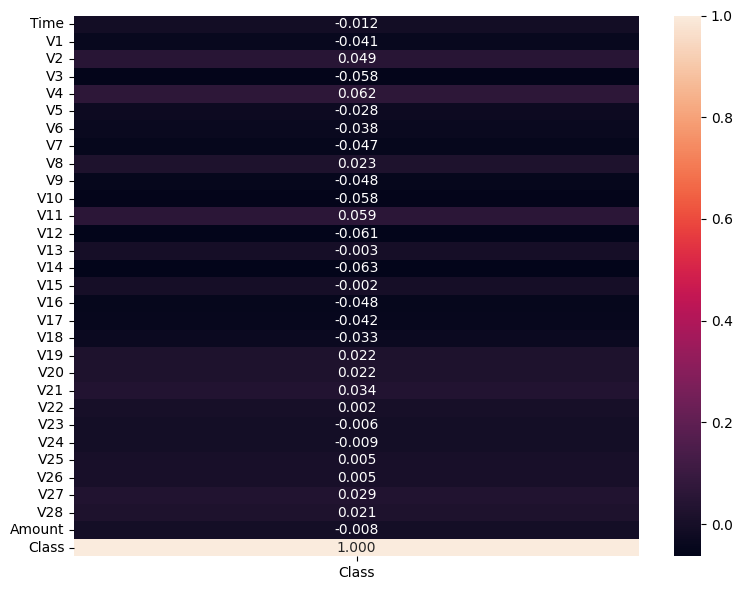

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(dataset.corr(method="spearman")[["Class"]],annot=True,fmt=".3f")
plt.tight_layout()

### Correlation Method

pearson is suitable for normally distributed data

kendall is suitable for non-normally distributed data

spearman is suitable for non-normally distributed data

kendall is more suitable for data with outliers

spearman is more suitable for data without outliers

### Bar Plot of Class Distribution

In [16]:
# dataset['Class'].value_counts().reset_index(name="Count")

In [17]:
print(dataset["Class"].value_counts().index)
dataset["Class"].value_counts().values

Index([0, 1], dtype='int64', name='Class')


array([283253,    473], dtype=int64)

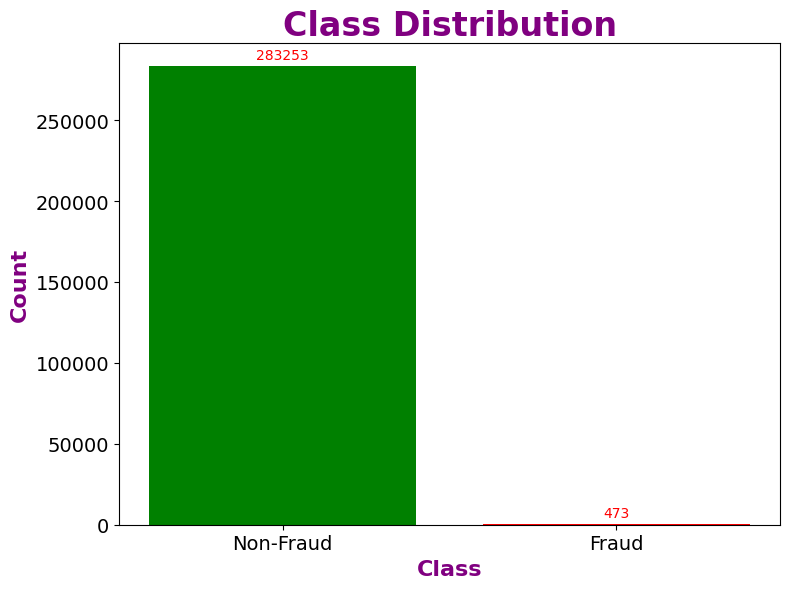

In [18]:
plt.figure(figsize=(8,6))
plt.bar(dataset["Class"].value_counts().index,dataset["Class"].value_counts().values)

plt.bar_label(container=plt.bar(dataset["Class"].value_counts().index,dataset["Class"].value_counts().values,color=["green","red"]),color="red",padding=3)
plt.xticks([0,1],["Non-Fraud","Fraud"],fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel("Class",fontsize=16,color="purple",fontweight="bold")
plt.ylabel("Count",fontsize=16,color="purple",fontweight="bold")
plt.title("Class Distribution",fontsize=24,color="purple",fontweight="bold")

# plt.legend()
plt.tight_layout()
plt.show()

### Analyzing before plotting graph of Variation of Amount per Class

In [19]:
fraud=dataset[dataset["Class"]==1]
nonfraud=dataset[dataset["Class"]==0]
fraud.shape,nonfraud.shape

((473, 31), (283253, 31))

In [20]:
print(f"Percentage of Fraud Transactions: {round(fraud.shape[0]/dataset.shape[0]*100,2)}%")

Percentage of Fraud Transactions: 0.17%


In [21]:
fraud["Amount"].describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [22]:
nonfraud["Amount"].describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

### Histogram of Variation Amount per Class

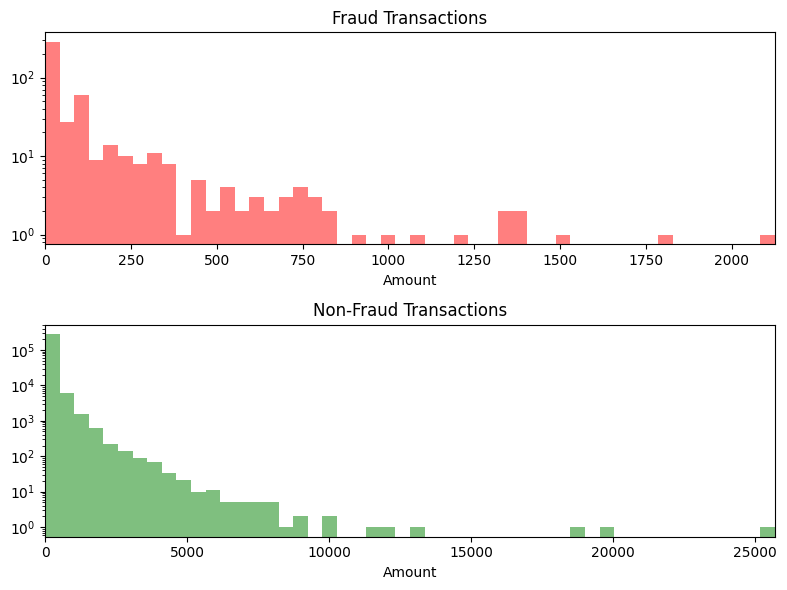

In [23]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(8,6))
ax1.hist(fraud["Amount"],bins=50,color="red",alpha=0.5,label="Fraud")
ax1.set_title("Fraud Transactions")
ax1.set_xlabel("Amount")
ax1.set_yscale("log")
ax1.set_xlim(0,fraud["Amount"].max())

ax2.hist(nonfraud["Amount"],bins=50,color="green",alpha=0.5,label="Non-Fraud")
ax2.set_title("Non-Fraud Transactions")
ax2.set_yscale("log")
ax2.set_xlabel("Amount")
ax2.set_xlim(0,nonfraud["Amount"].max())
plt.tight_layout()

## Data Preprocessing

### Droping Time Attribute
It is of no use to build the models and may not impact our target variable.

In [24]:
dataset.drop("Time",axis=1,inplace=True)

### Split into x and y

In [25]:
x=dataset.drop("Class",axis=1)
y=dataset["Class"]
x.shape,y.shape

((283726, 29), (283726,))

### Standardization Amount attribute values using StandardScaler

In [26]:
std=StandardScaler()
x["Amount"]=std.fit_transform(x["Amount"].values.reshape(-1,1))
x["Amount"]

0         0.244200
1        -0.342584
2         1.158900
3         0.139886
4        -0.073813
            ...   
284802   -0.350252
284803   -0.254325
284804   -0.082239
284805   -0.313391
284806    0.513290
Name: Amount, Length: 283726, dtype: float64

In [27]:
# Normalization Amount attribute values using MinMaxScaler
# x_mm=x.copy()
# x_mm
# minmax=MinMaxScaler()
# x_mm["Amount"]=minmax.fit_transform(x["Amount"].values.reshape(-1,1))
# x_mm["Amount"]

### Splitting Datasets

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# x_val,x_test,y_val,y_test=train_test_split(x_test,y_test,test_size=0.5,random_state=42)

x_train.shape,x_test.shape

((226980, 29), (56746, 29))

### Logistic Regression

In [29]:
LR=LogisticRegression()
print("Model fitting...")
LR.fit(x_train,y_train)
print("Model fitted!\n")

print("Training Dataset")
cr=classification_report(y_train,LR.predict(x_train))
print(f"Classification Report:\n{cr}")
print(f"Accuracy Score: {accuracy_score(y_train,LR.predict(x_train))}\n")

# print("Validation Dataset")
# cr=classification_report(y_val,LR.predict(x_val))
# print(f"Classification Report:\n{cr}")
# print(f"Accuracy Score: {accuracy_score(y_val,LR.predict(x_val))}\n")

print("Testing Dataset")
cr=classification_report(y_test,LR.predict(x_test))
print(f"Classification Report:\n{cr}")
print(f"Accuracy Score: {accuracy_score(y_test,LR.predict(x_test))}\n")

# fig,ax=plt.subplots(3,1,figsize=(6,4*3))
# sns.heatmap(confusion_matrix(y_train,LR.predict(x_train)),annot=True,cmap="coolwarm",fmt="g",ax=ax[0])
# ax[0].set_title("Confusion Matrix Training Dataset",color="orange",fontsize=16)
# ax[0].set_xlabel("Predicted Label")
# ax[0].set_ylabel("Actual Label")

# sns.heatmap(confusion_matrix(y_val,LR.predict(x_val)),annot=True,cmap="coolwarm",fmt="g",ax=ax[1])
# ax[1].set_title("Confusion Matrix Validation Dataset",color="orange",fontsize=16)
# ax[1].set_xlabel("Predicted Label")
# ax[1].set_ylabel("Actual Label")

# sns.heatmap(confusion_matrix(y_test,LR.predict(x_test)),annot=True,cmap="coolwarm",fmt="g",ax=ax[2])
# ax[2].set_title("Confusion Matrix Testing Dataset",color="orange",fontsize=16)
# ax[2].set_xlabel("Predicted Label")
# ax[2].set_ylabel("Actual Label")

# plt.tight_layout()
# plt.show()

Model fitting...
Model fitted!

Training Dataset
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226597
           1       0.87      0.62      0.73       383

    accuracy                           1.00    226980
   macro avg       0.93      0.81      0.86    226980
weighted avg       1.00      1.00      1.00    226980

Accuracy Score: 0.9992069785884219

Testing Dataset
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.88      0.54      0.67        90

    accuracy                           1.00     56746
   macro avg       0.94      0.77      0.84     56746
weighted avg       1.00      1.00      1.00     56746

Accuracy Score: 0.9991541254009093



### Decision Tree

In [30]:
DT=DecisionTreeClassifier()
print("Model fitting...")
DT.fit(x_train,y_train)
print("Model fitted!\n")

print("Training Dataset")
cr=classification_report(y_train,DT.predict(x_train))
print(f"Classification Report:\n{cr}")
print(f"Accuracy Score: {accuracy_score(y_train,DT.predict(x_train))}\n")

# print("Validation Dataset")
# cr=classification_report(y_val,DT.predict(x_val))
# print(f"Classification Report:\n{cr}")
# print(f"Accuracy Score: {accuracy_score(y_val,DT.predict(x_val))}\n")

print("Testing Dataset")
cr=classification_report(y_test,DT.predict(x_test))
print(f"Classification Report:\n{cr}")
print(f"Accuracy Score: {accuracy_score(y_test,DT.predict(x_test))}\n")

# fig,ax=plt.subplots(3,1,figsize=(6,4*3))
# sns.heatmap(confusion_matrix(y_train,DT.predict(x_train)),annot=True,cmap="coolwarm",fmt="g",ax=ax[0])
# ax[0].set_title("Confusion Matrix Training Dataset",color="orange",fontsize=16)
# ax[0].set_xlabel("Predicted Label")
# ax[0].set_ylabel("Actual Label")

# sns.heatmap(confusion_matrix(y_val,DT.predict(x_val)),annot=True,cmap="coolwarm",fmt="g",ax=ax[1])
# ax[1].set_title("Confusion Matrix Validation Dataset",color="orange",fontsize=16)
# ax[1].set_xlabel("Predicted Label")
# ax[1].set_ylabel("Actual Label")

# sns.heatmap(confusion_matrix(y_test,DT.predict(x_test)),annot=True,cmap="coolwarm",fmt="g",ax=ax[2])
# ax[2].set_title("Confusion Matrix Testing Dataset",color="orange",fontsize=16)
# ax[2].set_xlabel("Predicted Label")
# ax[2].set_ylabel("Actual Label")

# plt.tight_layout()
# plt.show()

Model fitting...
Model fitted!

Training Dataset
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226597
           1       1.00      1.00      1.00       383

    accuracy                           1.00    226980
   macro avg       1.00      1.00      1.00    226980
weighted avg       1.00      1.00      1.00    226980

Accuracy Score: 1.0

Testing Dataset
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.71      0.72      0.71        90

    accuracy                           1.00     56746
   macro avg       0.85      0.86      0.86     56746
weighted avg       1.00      1.00      1.00     56746

Accuracy Score: 0.9990836358509851



### Random Forest

In [31]:
RF=RandomForestClassifier()
print("Model fitting...")
RF.fit(x_train,y_train)
print("Model fitted!\n")

print("Training Dataset")
cr=classification_report(y_train,RF.predict(x_train))
print(f"Classification Report:\n{cr}")
print(f"Accuracy Score: {accuracy_score(y_train,RF.predict(x_train))}\n")

# print("Validation Dataset")
# cr=classification_report(y_val,RF.predict(x_val))
# print(f"Classification Report:\n{cr}")
# print(f"Accuracy Score: {accuracy_score(y_val,RF.predict(x_val))}\n")

print("Testing Dataset")
cr=classification_report(y_test,RF.predict(x_test))
print(f"Classification Report:\n{cr}")
print(f"Accuracy Score: {accuracy_score(y_test,RF.predict(x_test))}\n")

# fig,ax=plt.subplots(3,1,figsize=(6,4*3))
# sns.heatmap(confusion_matrix(y_train,RF.predict(x_train)),annot=True,cmap="coolwarm",fmt="g",ax=ax[0])
# ax[0].set_title("Confusion Matrix Training Dataset",color="orange",fontsize=16)
# ax[0].set_xlabel("Predicted Label")
# ax[0].set_ylabel("Actual Label")

# sns.heatmap(confusion_matrix(y_val,RF.predict(x_val)),annot=True,cmap="coolwarm",fmt="g",ax=ax[1])
# ax[1].set_title("Confusion Matrix Validation Dataset",color="orange",fontsize=16)
# ax[1].set_xlabel("Predicted Label")
# ax[1].set_ylabel("Actual Label")

# sns.heatmap(confusion_matrix(y_test,RF.predict(x_test)),annot=True,cmap="coolwarm",fmt="g",ax=ax[2])
# ax[2].set_title("Confusion Matrix Testing Dataset",color="orange",fontsize=16)
# ax[2].set_xlabel("Predicted Label")
# ax[2].set_ylabel("Actual Label")

# plt.tight_layout()
# plt.show()

Model fitting...


KeyboardInterrupt: 

### Extreme Gradient Boosting

Model fitting...
Model fitted!

Training Dataset
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226597
           1       1.00      1.00      1.00       383

    accuracy                           1.00    226980
   macro avg       1.00      1.00      1.00    226980
weighted avg       1.00      1.00      1.00    226980

Accuracy Score: 1.0

Testing Dataset
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.72      0.83        90

    accuracy                           1.00     56746
   macro avg       0.98      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746

Accuracy Score: 0.9995241955380115



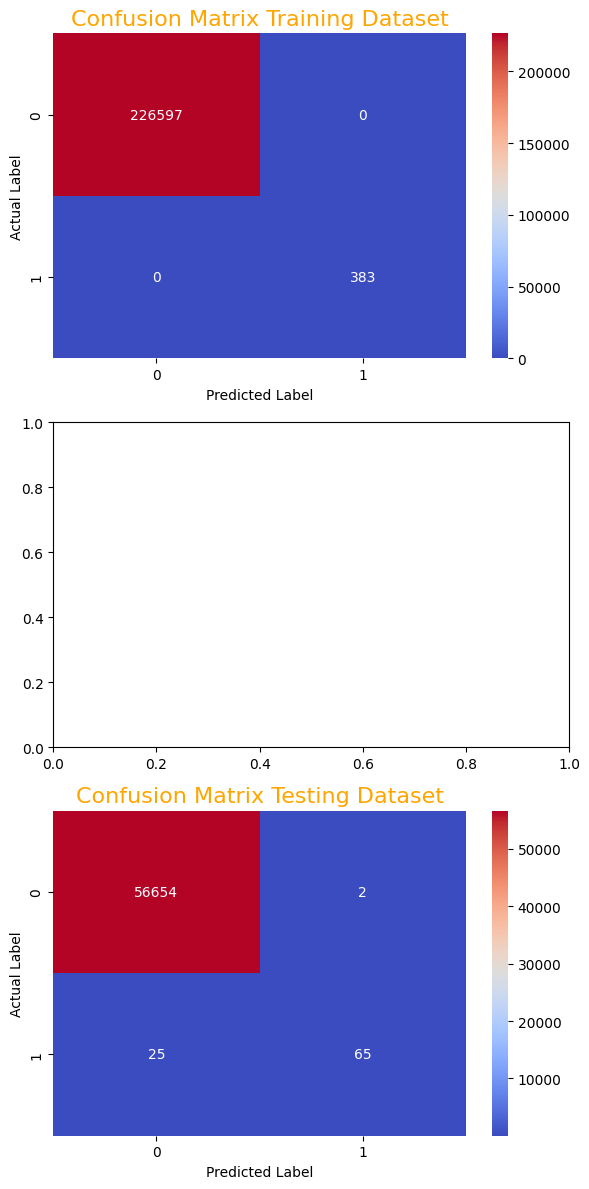

In [ ]:
XGB=XGBClassifier()
print("Model fitting...")
XGB.fit(x_train,y_train)
print("Model fitted!\n")

print("Training Dataset")
cr=classification_report(y_train,XGB.predict(x_train))
print(f"Classification Report:\n{cr}")
print(f"Accuracy Score: {accuracy_score(y_train,XGB.predict(x_train))}\n")

# print("Validation Dataset")
# cr=classification_report(y_val,XGB.predict(x_val))
# print(f"Classification Report:\n{cr}")
# print(f"Accuracy Score: {accuracy_score(y_val,XGB.predict(x_val))}\n")

print("Testing Dataset")
cr=classification_report(y_test,XGB.predict(x_test))
print(f"Classification Report:\n{cr}")
print(f"Accuracy Score: {accuracy_score(y_test,XGB.predict(x_test))}\n")

fig,ax=plt.subplots(3,1,figsize=(6,4*3))
sns.heatmap(confusion_matrix(y_train,XGB.predict(x_train)),annot=True,cmap="coolwarm",fmt="g",ax=ax[0])
ax[0].set_title("Confusion Matrix Training Dataset",color="orange",fontsize=16)
ax[0].set_xlabel("Predicted Label")
ax[0].set_ylabel("Actual Label")

# sns.heatmap(confusion_matrix(y_val,XGB.predict(x_val)),annot=True,cmap="coolwarm",fmt="g",ax=ax[1])
# ax[1].set_title("Confusion Matrix Validation Dataset",color="orange",fontsize=16)
# ax[1].set_xlabel("Predicted Label")
# ax[1].set_ylabel("Actual Label")

sns.heatmap(confusion_matrix(y_test,XGB.predict(x_test)),annot=True,cmap="coolwarm",fmt="g",ax=ax[2])
ax[2].set_title("Confusion Matrix Testing Dataset",color="orange",fontsize=16)
ax[2].set_xlabel("Predicted Label")
ax[2].set_ylabel("Actual Label")

plt.tight_layout()
plt.show()

### Classification Report LR vs DT vs RF vs XGB in Data Validation

In [ ]:
# print("Validation Dataset\n")

# print("-- Logistic Regression --")
# cr=classification_report(y_val,LR.predict(x_val))
# print(f"Classification Report:\n{cr}")
# print(f"Accuracy Score: {accuracy_score(y_val,LR.predict(x_val))}\n")

# print("-- Decision Tree --")
# cr=classification_report(y_val,DT.predict(x_val))
# print(f"Classification Report:\n{cr}")
# print(f"Accuracy Score: {accuracy_score(y_val,DT.predict(x_val))}\n")

# print("-- Random Forest --")
# cr=classification_report(y_val,RF.predict(x_val))
# print(f"Classification Report:\n{cr}")
# print(f"Accuracy Score: {accuracy_score(y_val,RF.predict(x_val))}\n")

# print("-- Extreme Gradient Boosting --")
# cr=classification_report(y_val,XGB.predict(x_val))
# print(f"Classification Report:\n{cr}")
# print(f"Accuracy Score: {accuracy_score(y_val,XGB.predict(x_val))}\n")

### Classification Report LR vs DT vs RF vs XGB in Data Testing

In [ ]:
print("Testing Dataset\n")

print("-- Logistic Regression --")
cr=classification_report(y_test,LR.predict(x_test))
print(f"Classification Report:\n{cr}")
print(f"Accuracy Score: {accuracy_score(y_test,LR.predict(x_test))}\n")

print("-- Decision Tree --")
cr=classification_report(y_test,DT.predict(x_test))
print(f"Classification Report:\n{cr}")
print(f"Accuracy Score: {accuracy_score(y_test,DT.predict(x_test))}\n")

print("-- Random Forest --")
cr=classification_report(y_test,RF.predict(x_test))
print(f"Classification Report:\n{cr}")
print(f"Accuracy Score: {accuracy_score(y_test,RF.predict(x_test))}\n")

print("-- Extreme Gradient Boosting --")
cr=classification_report(y_test,XGB.predict(x_test))
print(f"Classification Report:\n{cr}")
print(f"Accuracy Score: {accuracy_score(y_test,XGB.predict(x_test))}\n")

Testing Dataset

-- Logistic Regression --
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.88      0.54      0.67        90

    accuracy                           1.00     56746
   macro avg       0.94      0.77      0.84     56746
weighted avg       1.00      1.00      1.00     56746

Accuracy Score: 0.9991541254009093

-- Decision Tree --
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.70      0.71      0.71        90

    accuracy                           1.00     56746
   macro avg       0.85      0.86      0.85     56746
weighted avg       1.00      1.00      1.00     56746

Accuracy Score: 0.999066013463504

-- Random Forest --
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1  

### Confusion Matrix LR vs DT vs RF vs XGB in Data Validation

In [ ]:
# fig,ax=plt.subplots(4,1,figsize=(6,4*4))
# sns.heatmap(confusion_matrix(y_val,LR.predict(x_val)),annot=True,cmap="coolwarm",fmt="g",ax=ax[0])
# ax[0].set_title("Confusion Matrix Logistic Regression (Validation)",color="darkorange",fontsize=16)
# ax[0].set_xlabel("Predicted Label",fontsize=14)
# ax[0].set_ylabel("Actual Label",fontsize=14)

# sns.heatmap(confusion_matrix(y_val,DT.predict(x_val)),annot=True,cmap="coolwarm",fmt="g",ax=ax[1])
# ax[1].set_title("Confusion Matrix Decision Tree (Validation)",color="darkorange",fontsize=16)
# ax[1].set_xlabel("Predicted Label",fontsize=14)
# ax[1].set_ylabel("Actual Label",fontsize=14)

# sns.heatmap(confusion_matrix(y_val,RF.predict(x_val)),annot=True,cmap="coolwarm",fmt="g",ax=ax[2])
# ax[2].set_title("Confusion Matrix Random Forest (Validation)",color="darkorange",fontsize=16)
# ax[2].set_xlabel("Predicted Label",fontsize=14)
# ax[2].set_ylabel("Actual Label",fontsize=14)

# sns.heatmap(confusion_matrix(y_val,XGB.predict(x_val)),annot=True,cmap="coolwarm",fmt="g",ax=ax[3])
# ax[3].set_title("Confusion Matrix Extreme Gradient Boosting (Validation)",color="darkorange",fontsize=16)
# ax[3].set_xlabel("Predicted Label",fontsize=14)
# ax[3].set_ylabel("Actual Label",fontsize=14)

# plt.tight_layout()
# plt.show()

### Confusion Matrix LR vs DT vs RF vs XGB in Data Testing

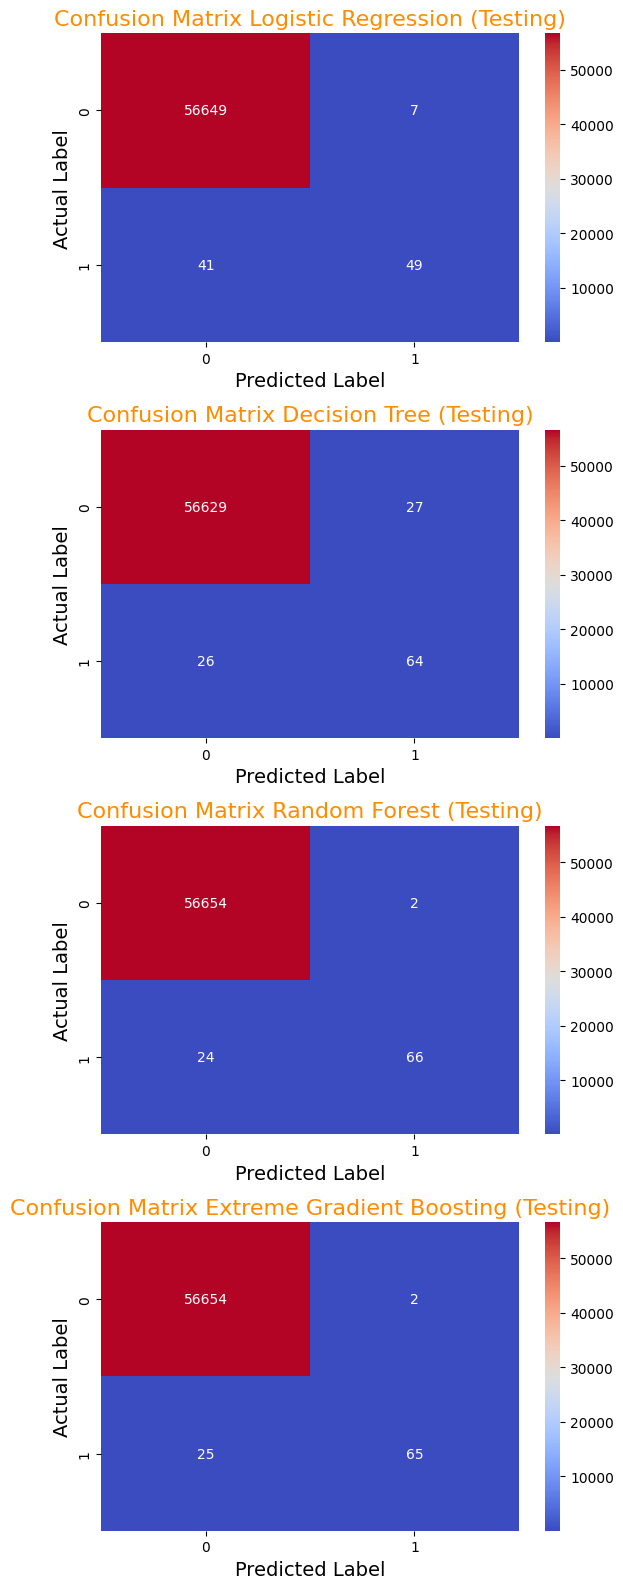

In [ ]:
fig,ax=plt.subplots(4,1,figsize=(6,4*4))
sns.heatmap(confusion_matrix(y_test,LR.predict(x_test)),annot=True,cmap="coolwarm",fmt="g",ax=ax[0],cbar=False)
ax[0].set_title("Confusion Matrix Logistic Regression (Testing)",color="darkorange",fontsize=16)
ax[0].set_xlabel("Predicted Label",fontsize=14)
ax[0].set_ylabel("Actual Label",fontsize=14)

sns.heatmap(confusion_matrix(y_test,DT.predict(x_test)),annot=True,cmap="coolwarm",fmt="g",ax=ax[1],cbar=False)
ax[1].set_title("Confusion Matrix Decision Tree (Testing)",color="darkorange",fontsize=16)
ax[1].set_xlabel("Predicted Label",fontsize=14)
ax[1].set_ylabel("Actual Label",fontsize=14)

sns.heatmap(confusion_matrix(y_test,RF.predict(x_test)),annot=True,cmap="coolwarm",fmt="g",ax=ax[2],cbar=False)
ax[2].set_title("Confusion Matrix Random Forest (Testing)",color="darkorange",fontsize=16)
ax[2].set_xlabel("Predicted Label",fontsize=14)
ax[2].set_ylabel("Actual Label",fontsize=14)

sns.heatmap(confusion_matrix(y_test,XGB.predict(x_test)),annot=True,cmap="coolwarm",fmt="g",ax=ax[3],cbar=False)
ax[3].set_title("Confusion Matrix Extreme Gradient Boosting (Testing)",color="darkorange",fontsize=16)
ax[3].set_xlabel("Predicted Label",fontsize=14)
ax[3].set_ylabel("Actual Label",fontsize=14)

plt.tight_layout()
plt.show()

Based on the results in the testing data, it can be determined that the XGBoost classification algorithm has the best results based on various performance measures, such as Precision, Recall, F1-Score, Accuracy scores of 98%, 91%, 95%, 99.96% respectively which concludes the biased nature of the algorithm when performing validation, which indicates the unbalanced nature of the data. Thus, the data balancing technique was chosen to be applied to the algorithm that produced the best results, no matter the bias, i.e. XGBoost Classification algorithm.

### AUPRC Evaluation Metric

Average Precision Score (Logistic Regression): 0.70642
Average Precision Score (Decision Tree): 0.50058
Average Precision Score (Random Forest): 0.80826
Average Precision Score (XGBoost): 0.82587


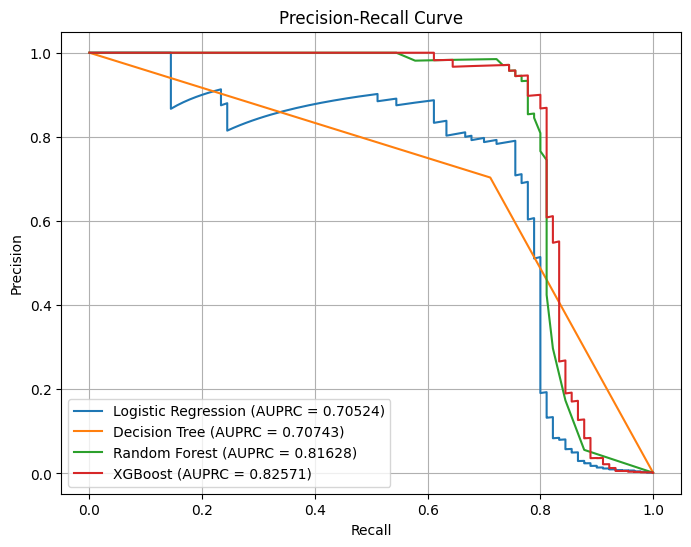

In [ ]:
def plot_pr_curve(model, x_test, y_test, model_name):
    probs = model.predict_proba(x_test)[:, 1]
    
    ap=average_precision_score(y_test, probs)
    print(f"Average Precision Score ({model_name}): {ap:.5f}")
    
    precision, recall, _ = precision_recall_curve(y_test, probs)

    auprc = auc(recall, precision)

    plt.plot(recall, precision, label=f'{model_name} (AUPRC = {auprc:.5f})')


plt.figure(figsize=(8, 6))
plot_pr_curve(LR, x_test, y_test, 'Logistic Regression')
plot_pr_curve(DT, x_test, y_test, 'Decision Tree')
plot_pr_curve(RF, x_test, y_test, 'Random Forest')
plot_pr_curve(XGB, x_test, y_test, 'XGBoost')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

## Undersampling Methods for Imbalanced Data

In [ ]:
List_x_y=[]

In [ ]:
x_train.shape,y_train.shape

((226980, 29), (226980,))

In [ ]:
y_train.value_counts()

Class
0    226597
1       383
Name: count, dtype: int64

### Condensed Nearest Neighbour (CNN)

In [ ]:
from imblearn.under_sampling import CondensedNearestNeighbour

cnn = CondensedNearestNeighbour(sampling_strategy="auto", random_state = 42, n_neighbors=1, n_jobs = -1)
x_cnn,y_cnn = cnn.fit_resample(x,y)
x_train_cnn,x_test_cnn,y_train_cnn,y_test_cnn=train_test_split(x_cnn,y_cnn,test_size=0.2,random_state=42)

List_x_y.append(("CNN",x_train_cnn,y_train_cnn,x_test_cnn,y_test_cnn))
x_train_cnn.shape,y_train_cnn.shape

((1287, 29), (1287,))

In [ ]:
y_train_cnn.value_counts()

Class
0    905
1    382
Name: count, dtype: int64

### Neighbourhood Cleaning Rule (NCR)

In [ ]:
from imblearn.under_sampling import NeighbourhoodCleaningRule,EditedNearestNeighbours

ncr = NeighbourhoodCleaningRule(sampling_strategy="auto",n_neighbors=3,threshold_cleaning=0.5,n_jobs=-1)
x_ncr,y_ncr = ncr.fit_resample(x,y)
x_train_ncr,x_test_ncr,y_train_ncr,y_test_ncr=train_test_split(x_ncr,y_ncr,test_size=0.2,random_state=42)

List_x_y.append(("NCR",x_train_ncr,y_train_ncr,x_test_ncr,y_test_ncr))
x_train_ncr.shape,y_train_ncr.shape

((226766, 29), (226766,))

In [ ]:
y_train_ncr.value_counts()

Class
0    226389
1       377
Name: count, dtype: int64

### Random Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus=RandomUnderSampler(sampling_strategy="auto",random_state=42)
x_rus,y_rus=rus.fit_resample(x,y)
x_train_rus,x_test_rus,y_train_rus,y_test_rus=train_test_split(x_rus,y_rus,test_size=0.2,random_state=42)
List_x_y.append(("RUS",x_train_rus,y_train_rus,x_test_rus,y_test_rus))
x_train_rus.shape,y_train_rus.shape

((756, 29), (756,))

In [ ]:
y_train_rus.value_counts()

Class
0    385
1    371
Name: count, dtype: int64

## Oversampling Methods for Imbalanced Data

### Synthetic Minority Oversampling Technique (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE
# from collections import Counter

smote=SMOTE(sampling_strategy="auto",random_state=42)
x_smote,y_smote=smote.fit_resample(x,y)
x_train_smote,x_test_smote,y_train_smote,y_test_smote=train_test_split(x_smote,y_smote,test_size=0.2,random_state=42)

List_x_y.append(("SMOTE",x_train_smote,y_train_smote,x_test_smote,y_test_smote))
x_train_smote.shape,y_train_smote.shape

((453204, 29), (453204,))

In [ ]:
y_train_smote.value_counts()

Class
0    226790
1    226414
Name: count, dtype: int64

### Adaptive Synthetic Sampling (ADASYN)

In [ ]:
from imblearn.over_sampling import ADASYN

adasyn=ADASYN(sampling_strategy="auto",random_state=42)
x_adasyn,y_adasyn=adasyn.fit_resample(x,y)

x_train_adasyn,x_test_adasyn,y_train_adasyn,y_test_adasyn=train_test_split(x_adasyn,y_adasyn,test_size=0.2,random_state=42)

List_x_y.append(("ADASYN",x_train_adasyn,y_train_adasyn,x_test_adasyn,y_test_adasyn))
x_train_adasyn.shape,y_train_adasyn.shape

((453243, 29), (453243,))

In [ ]:
y_train_adasyn.value_counts()

Class
1    226625
0    226618
Name: count, dtype: int64

### Random Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros=RandomOverSampler(sampling_strategy="auto",random_state=42)
x_ros,y_ros=ros.fit_resample(x,y)
x_train_ros,x_test_ros,y_train_ros,y_test_ros=train_test_split(x_ros,y_ros,test_size=0.2,random_state=42)

List_x_y.append(("ROS",x_train_ros,y_train_ros,x_test_ros,y_test_ros))
x_train_ros.shape,y_train_ros.shape

((453204, 29), (453204,))

In [ ]:
y_train_ros.value_counts()

Class
0    226790
1    226414
Name: count, dtype: int64

## Oversampling + Undersampling Methods for Imbalanced Data

### SMOTE + Random Undersampling

In [ ]:
smote=SMOTE(sampling_strategy="auto",random_state=42)
rus=RandomUnderSampler(sampling_strategy="auto",random_state=42)

x_sm,y_sm=smote.fit_resample(x,y)
print(x_sm.shape,y_sm.shape)
print(x_sm.head())
print(y_sm.head())
print(y_sm.value_counts())

x_smote_rus,y_smote_rus=rus.fit_resample(x_sm,y_sm)
x_train_smote_rus,x_test_smote_rus,y_train_smote_rus,y_test_smote_rus=train_test_split(x_smote_rus,y_smote_rus,test_size=0.2,random_state=42)

List_x_y.append(("SMOTE+ROS",x_train_smote_rus,y_train_smote_rus,x_test_smote_rus,y_test_smote_rus))

(566506, 29) (566506,)
         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.098698  0.363787  0.090794  ...  0.251412 -0.018307  0.277838 -0.110474   
1  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775 -0.638672  0.101288   
2  0.247676 -1.514654  0.207643  ...  0.524980  0.247998  0.771679  0.909412   
3  0.377436 -1.387024 -0.054952  ... -0.208038 -0.108300  0.005274 -0.190321   
4 -0.270533  0.817739  0.753074  ...  0.408542 -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27    

In [ ]:
print(x_smote_rus.head())
print(y_smote_rus.head())
print(x_smote_rus.shape,y_smote_rus.shape)
print(y_smote_rus.value_counts())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.098698  0.363787  0.090794  ...  0.251412 -0.018307  0.277838 -0.110474   
1  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775 -0.638672  0.101288   
2  0.247676 -1.514654  0.207643  ...  0.524980  0.247998  0.771679  0.909412   
3  0.377436 -1.387024 -0.054952  ... -0.208038 -0.108300  0.005274 -0.190321   
4 -0.270533  0.817739  0.753074  ...  0.408542 -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27       V28    Amount  
0  0

In [ ]:
print(x_train_smote_rus.head())
print(y_train_smote_rus.head())
print(x_train_smote_rus.shape,y_train_smote_rus.shape)
print(y_train_smote_rus.value_counts())

               V1        V2         V3         V4        V5        V6  \
397446   0.220034  1.445556  -1.148746   4.157915 -1.552659 -0.317933   
1936    -1.033987  1.041940   1.060898  -0.497569  0.006749 -0.395604   
434734   1.202370  3.227070  -6.026245   5.696593  1.572126 -2.256563   
224780  -0.352196  0.249673  -1.555285  -0.272258 -0.464907 -0.940449   
559597 -14.336724  7.551955 -21.540394  11.921424 -8.082050 -2.220252   

               V7        V8        V9        V10  ...       V20       V21  \
397446  -2.817294  0.807319 -1.327014  -3.034732  ...  0.336784  0.433911   
1936     0.387252  0.051773  0.294614   0.407072  ...  0.073469 -0.143513   
434734  -0.799127  0.100791 -2.999501  -4.047219  ...  0.337941  0.101654   
224780   1.444924  0.157664  0.457326  -1.750739  ...  0.152989  0.190874   
559597 -15.576172 -0.231165 -6.373426 -13.323309  ...  1.001373 -2.365402   

             V22       V23       V24       V25       V26       V27       V28  \
397446  0.178127 -

### ADASYN + NCR

In [ ]:
adasyn=ADASYN(sampling_strategy="auto",random_state=42)
ncr = NeighbourhoodCleaningRule(sampling_strategy="auto",n_neighbors=3,threshold_cleaning=0.5,n_jobs=-1)

x_ad,y_ad=adasyn.fit_resample(x,y)

print(x_ad.shape,y_ad.shape)
print(x_ad.head())
print(y_ad.head())
print(y_ad.value_counts())

x_adasyn_ncr,y_adasyn_ncr=ncr.fit_resample(x_ad,y_ad)
x_train_adasyn_ncr,x_test_adasyn_ncr,y_train_adasyn_ncr,y_test_adasyn_ncr=train_test_split(x_adasyn_ncr,y_adasyn_ncr,test_size=0.2,random_state=42)

List_x_y.append(("ADASYN+NCR",x_train_adasyn_ncr,y_train_adasyn_ncr,x_test_adasyn_ncr,y_test_adasyn_ncr))

(566554, 29) (566554,)
         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.098698  0.363787  0.090794  ...  0.251412 -0.018307  0.277838 -0.110474   
1  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775 -0.638672  0.101288   
2  0.247676 -1.514654  0.207643  ...  0.524980  0.247998  0.771679  0.909412   
3  0.377436 -1.387024 -0.054952  ... -0.208038 -0.108300  0.005274 -0.190321   
4 -0.270533  0.817739  0.753074  ...  0.408542 -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27    

In [ ]:
print(x_adasyn_ncr.head())
print(y_adasyn_ncr.head())
print(x_adasyn_ncr.shape,y_adasyn_ncr.shape)
print(y_adasyn_ncr.value_counts())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.098698  0.363787  0.090794  ...  0.251412 -0.018307  0.277838 -0.110474   
1  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775 -0.638672  0.101288   
2  0.247676 -1.514654  0.207643  ...  0.524980  0.247998  0.771679  0.909412   
3  0.377436 -1.387024 -0.054952  ... -0.208038 -0.108300  0.005274 -0.190321   
4 -0.270533  0.817739  0.753074  ...  0.408542 -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27       V28    Amount  
0  0

In [ ]:
print(x_train_adasyn_ncr.head())
print(y_train_adasyn_ncr.head())
print(x_train_adasyn_ncr.shape,y_train_adasyn_ncr.shape)
print(y_train_adasyn_ncr.value_counts())

              V1        V2        V3        V4        V5        V6        V7  \
280332 -0.685980  0.476732  0.901101 -1.071402  0.786378  0.192768  0.760346   
211879  0.016133  0.831794  0.154214 -0.806182  0.736297 -0.468989  0.936670   
400342 -0.864842 -1.082283  0.541784  0.301010 -0.463100 -0.054696  0.279277   
63208   1.524481 -0.443952 -0.917431 -1.170535  0.196548 -0.104157 -0.219461   
392701 -0.754742 -0.046666 -0.123644 -1.228476 -1.850491  0.747879  3.016601   

              V8        V9       V10  ...       V20       V21       V22  \
280332 -0.226449  0.472672 -0.199767  ...  0.084992 -0.309805 -0.534605   
211879 -0.044105 -0.370397 -0.270107  ...  0.023803 -0.220582 -0.459694   
400342 -0.220159 -0.487840  0.525106  ... -1.202783 -0.601467 -0.598383   
63208  -0.107692 -1.174652  0.880380  ...  0.084475  0.120102  0.212776   
392701 -0.472546  0.585410 -1.716648  ... -0.004578  0.051920  0.408562   

             V23       V24       V25       V26       V27       V28  

## Classification Report XGBoost in Data Validation with Resampling Method

In [ ]:
# XGB=XGBClassifier()
# print("--- Validation Dataset ---")
# print("-- Extreme Gradient Boosting --\n")
# for name,x,y in List_x_y:
#     print("Model fitting...")
#     XGB.fit(x,y)
#     print(f"Model fitted - {name}!\n")

#     cr=classification_report(y_val,XGB.predict(x_val))
#     print(f"Classification Report:\n{cr}")
#     print(f"Accuracy Score: {accuracy_score(y_val,XGB.predict(x_val))}\n\n\n")

## Classification Report XGBoost in Data Testing with Resampling Method

In [ ]:
print("--- Testing Dataset ---")
print("-- Extreme Gradient Boosting --\n")
for name,x_tr,y_tr,x_ts,y_ts in List_x_y:
    print("Model fitting...")
    XGB.fit(x_tr,y_tr)
    print(f"Model fitted - {name}!\n")
    
    y_preds=XGB.predict(x_ts)
    
    cr=classification_report(y_ts,y_preds)
    
    print(f"Classification Report:\n{cr}")
    print(f"Accuracy Score: {accuracy_score(y_ts,y_preds)}\n\n\n")

--- Testing Dataset ---
-- Extreme Gradient Boosting --

Model fitting...
Model fitted - CNN!

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       231
           1       0.87      0.79      0.83        91

    accuracy                           0.91       322
   macro avg       0.89      0.87      0.88       322
weighted avg       0.91      0.91      0.91       322

Accuracy Score: 0.906832298136646



Model fitting...
Model fitted - NCR!

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56596
           1       1.00      0.79      0.88        96

    accuracy                           1.00     56692
   macro avg       1.00      0.90      0.94     56692
weighted avg       1.00      1.00      1.00     56692

Accuracy Score: 0.9996472165384886



Model fitting...
Model fitted - RUS!

Classification Report:
              precision    reca

## Classification Report Random Forest in Data Testing with Resampling Method

In [ ]:
print("--- Testing Dataset ---")
print("-- Extreme Gradient Boosting --\n")
for name,x_tr,y_tr,x_ts,y_ts in List_x_y:
    print("Model fitting...")
    RF.fit(x_tr,y_tr)
    print(f"Model fitted - {name}!\n")
    
    y_preds=RF.predict(x_ts)
    
    cr=classification_report(y_ts,y_preds)
    
    print(f"Classification Report:\n{cr}")
    print(f"Accuracy Score: {accuracy_score(y_ts,y_preds)}\n\n\n")

--- Testing Dataset ---
-- Extreme Gradient Boosting --

Model fitting...
Model fitted - CNN!

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       231
           1       0.90      0.78      0.84        91

    accuracy                           0.91       322
   macro avg       0.91      0.87      0.89       322
weighted avg       0.91      0.91      0.91       322

Accuracy Score: 0.9130434782608695



Model fitting...
Model fitted - NCR!

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56596
           1       0.99      0.76      0.86        96

    accuracy                           1.00     56692
   macro avg       0.99      0.88      0.93     56692
weighted avg       1.00      1.00      1.00     56692

Accuracy Score: 0.9995766598461864



Model fitting...
Model fitted - RUS!

Classification Report:
              precision    rec

## Confusion Matrix XGBoost in Data Validation with Resampling Method

In [ ]:
# print(f"--- Validation Dataset ---")
# print("-- Extreme Gradient Boosting --\n")
# for name,x,y in List_x_y:
#     XGB.fit(x,y)
#     cm=confusion_matrix(y_val,XGB.predict(x_val))
#     sns.heatmap(cm,annot=True,cmap="coolwarm",fmt="g")
#     plt.title(f"Confusion Matrix ({name})",color="darkorange",fontsize=16)
#     plt.xlabel("Predicted Label",fontsize=14)
#     plt.ylabel("Actual Label",fontsize=14)
#     plt.tight_layout()
#     plt.show()

## Confusion Matrix XGBoost in Data Testing with Resampling Method

--- Testing Dataset ---
-- Extreme Gradient Boosting --



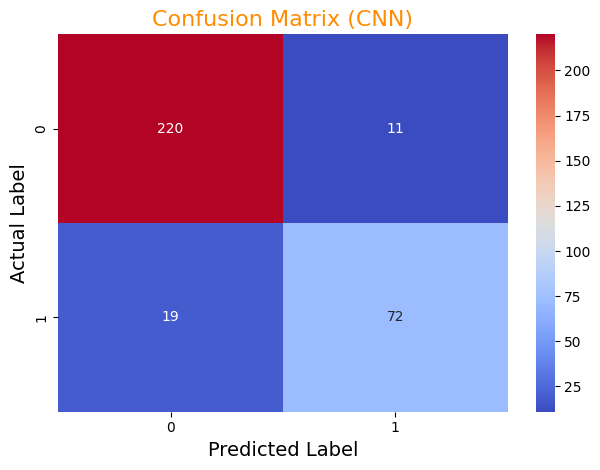

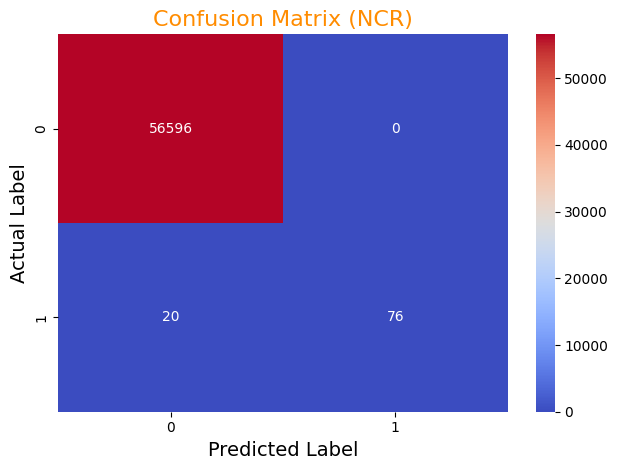

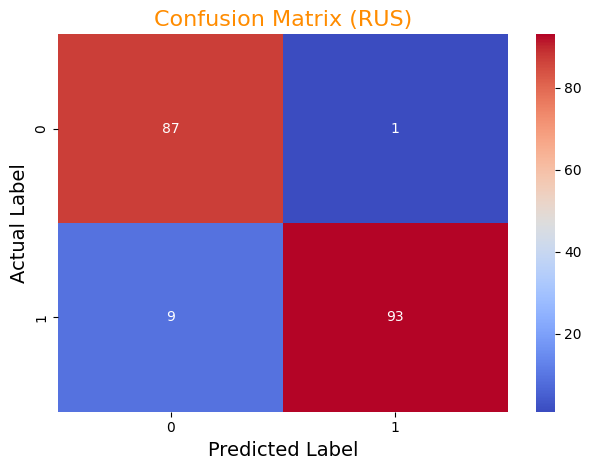

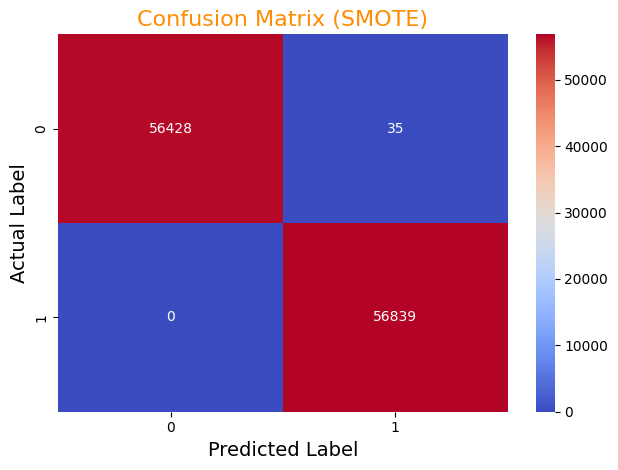

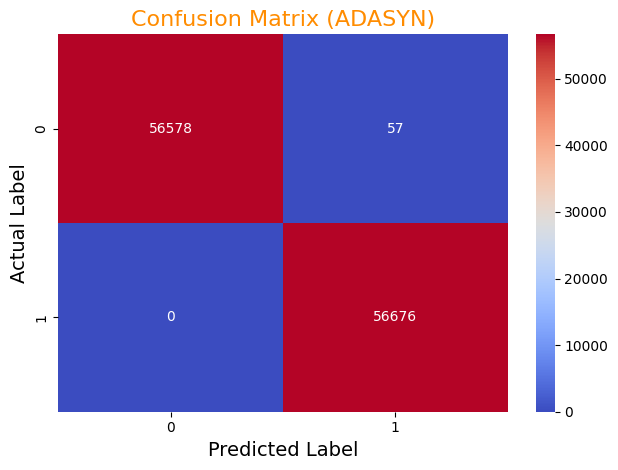

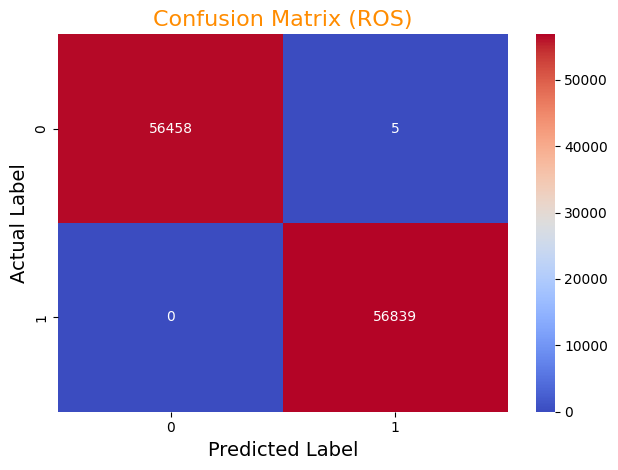

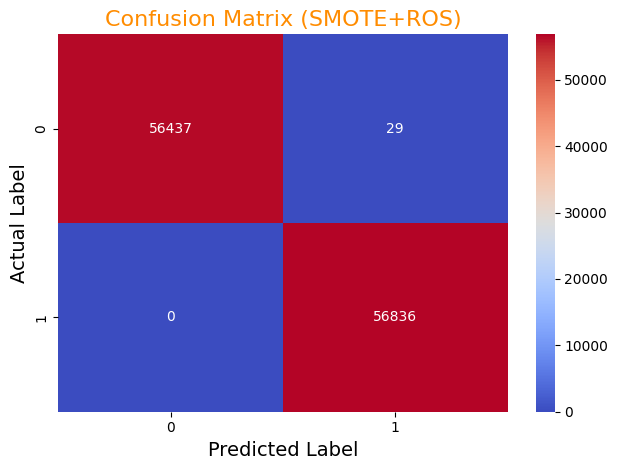

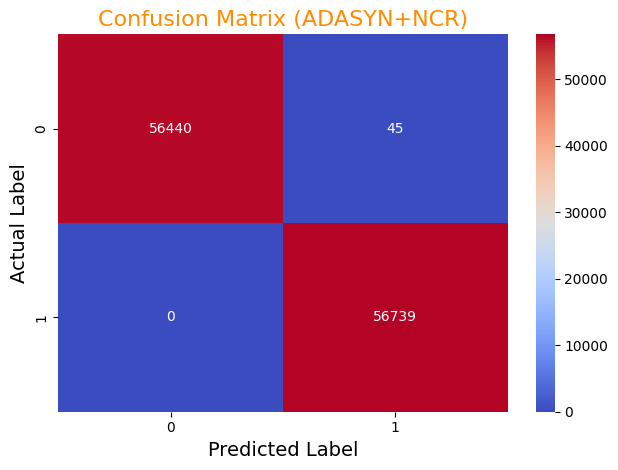

In [ ]:
print(f"--- Testing Dataset ---")
print("-- Extreme Gradient Boosting --\n")
for name,x_tr,y_tr,x_ts,y_ts in List_x_y:
    XGB.fit(x_tr,y_tr)
    
    y_preds=XGB.predict(x_ts)
    
    cm=confusion_matrix(y_ts,y_preds)
    
    sns.heatmap(cm,annot=True,cmap="coolwarm",fmt="g",cbar=False)
    plt.title(f"Confusion Matrix ({name})",color="darkorange",fontsize=16)
    plt.xlabel("Predicted Label",fontsize=14)
    plt.ylabel("Actual Label",fontsize=14)
    plt.tight_layout()
    plt.show()

## Confusion Matrix Random Forest in Data Testing with Resampling Method

--- Testing Dataset ---
-- Extreme Gradient Boosting --



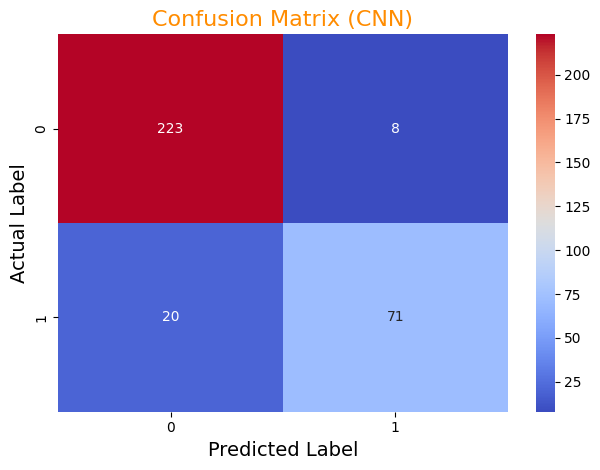

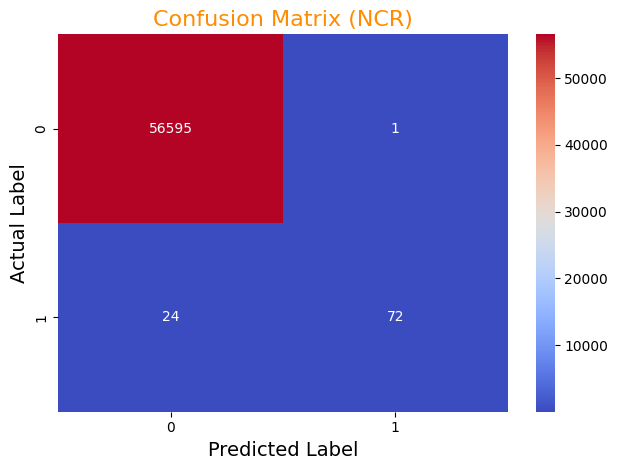

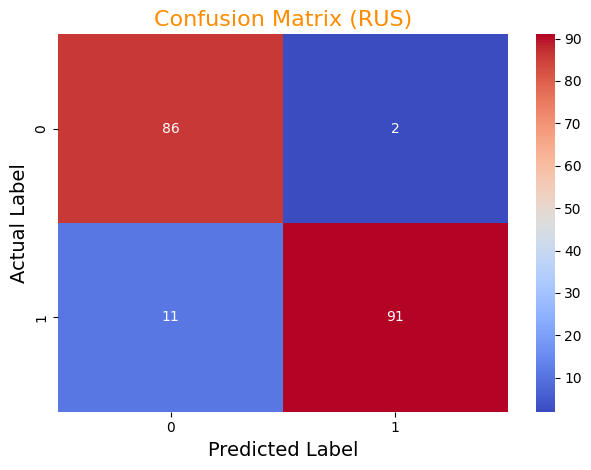

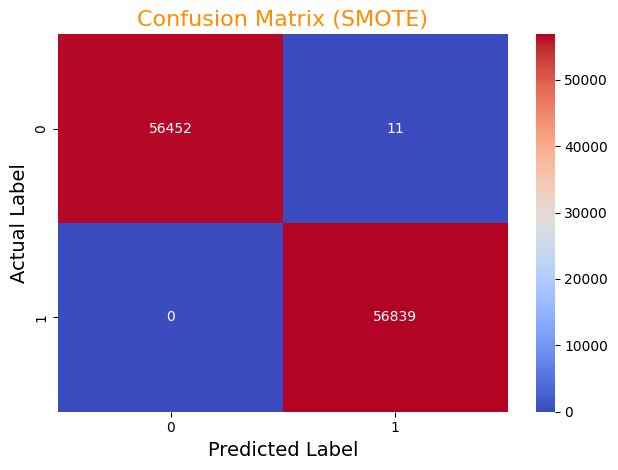

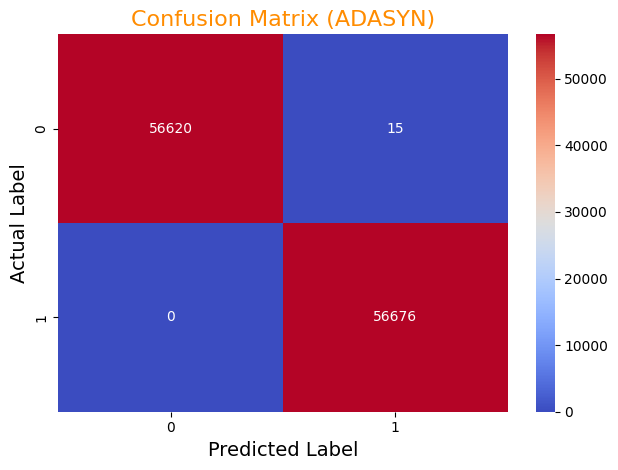

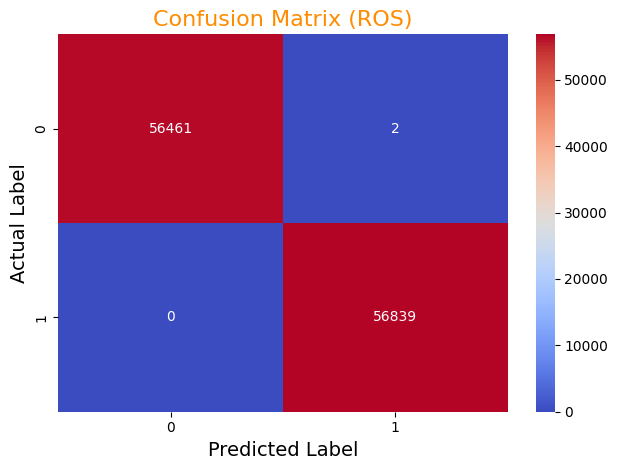

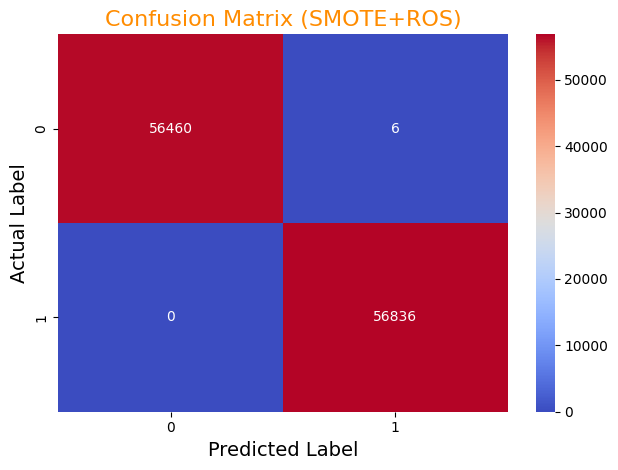

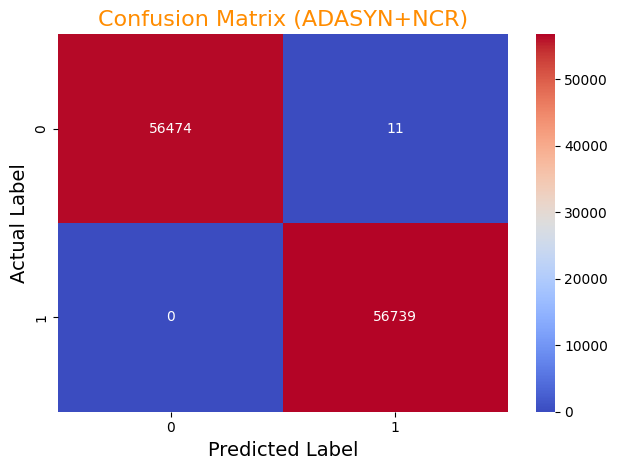

In [ ]:
print(f"--- Testing Dataset ---")
print("-- Random Forest --\n")
for name,x_tr,y_tr,x_ts,y_ts in List_x_y:
    RF.fit(x_tr,y_tr)
    
    y_preds=RF.predict(x_ts)
    
    cm=confusion_matrix(y_ts,y_preds)
    
    sns.heatmap(cm,annot=True,cmap="coolwarm",fmt="g",cbar=False)
    plt.title(f"Confusion Matrix ({name})",color="darkorange",fontsize=16)
    plt.xlabel("Predicted Label",fontsize=14)
    plt.ylabel("Actual Label",fontsize=14)
    plt.tight_layout()
    plt.show()

## AUPRC with Resampling Method

Average Precision Score (CNN): 0.74536
Average Precision Score (NCR): 0.79202
Average Precision Score (RUS): 0.94943
Average Precision Score (SMOTE): 0.99938
Average Precision Score (ADASYN): 0.99900
Average Precision Score (ROS): 0.99991
Average Precision Score (SMOTE+ROS): 0.99949
Average Precision Score (ADASYN+NCR): 0.99921


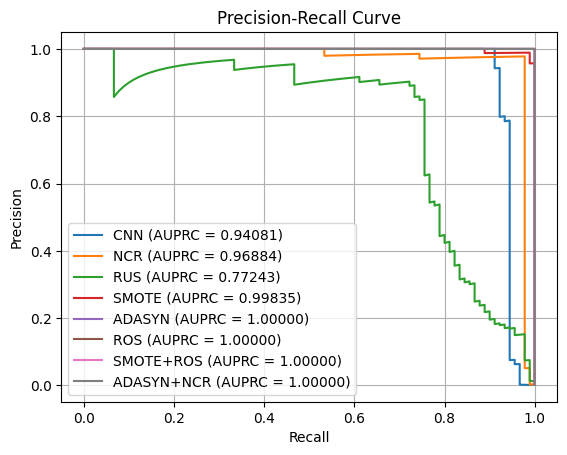

In [ ]:
for name,x_tr,y_tr,x_ts,y_ts in List_x_y:
    XGB.fit(x_tr,y_tr)
    
    y_preds=XGB.predict(x_ts)
    
    ap=average_precision_score(y_ts,y_preds)
    print(f"Average Precision Score ({name}): {ap:.5f}")
    
    precision, recall, _ = precision_recall_curve(y_ts, XGB.predict_proba(x_ts)[:, 1])
    
    auprc = auc(recall, precision)
    
    plt.plot(recall, precision, label=f'{name} (AUPRC = {auprc:.5f})')
    
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

### Comparison of All Resampling Method Using F1-Score

--- Testing Dataset ---
-- Extreme Gradient Boosting --

Model fitting...
Model fitted - CNN!

Model fitting...
Model fitted - NCR!

Model fitting...
Model fitted - RUS!

Model fitting...
Model fitted - SMOTE!

Model fitting...
Model fitted - ADASYN!

Model fitting...
Model fitted - ROS!

Model fitting...
Model fitted - SMOTE+ROS!

Model fitting...
Model fitted - ADASYN+NCR!



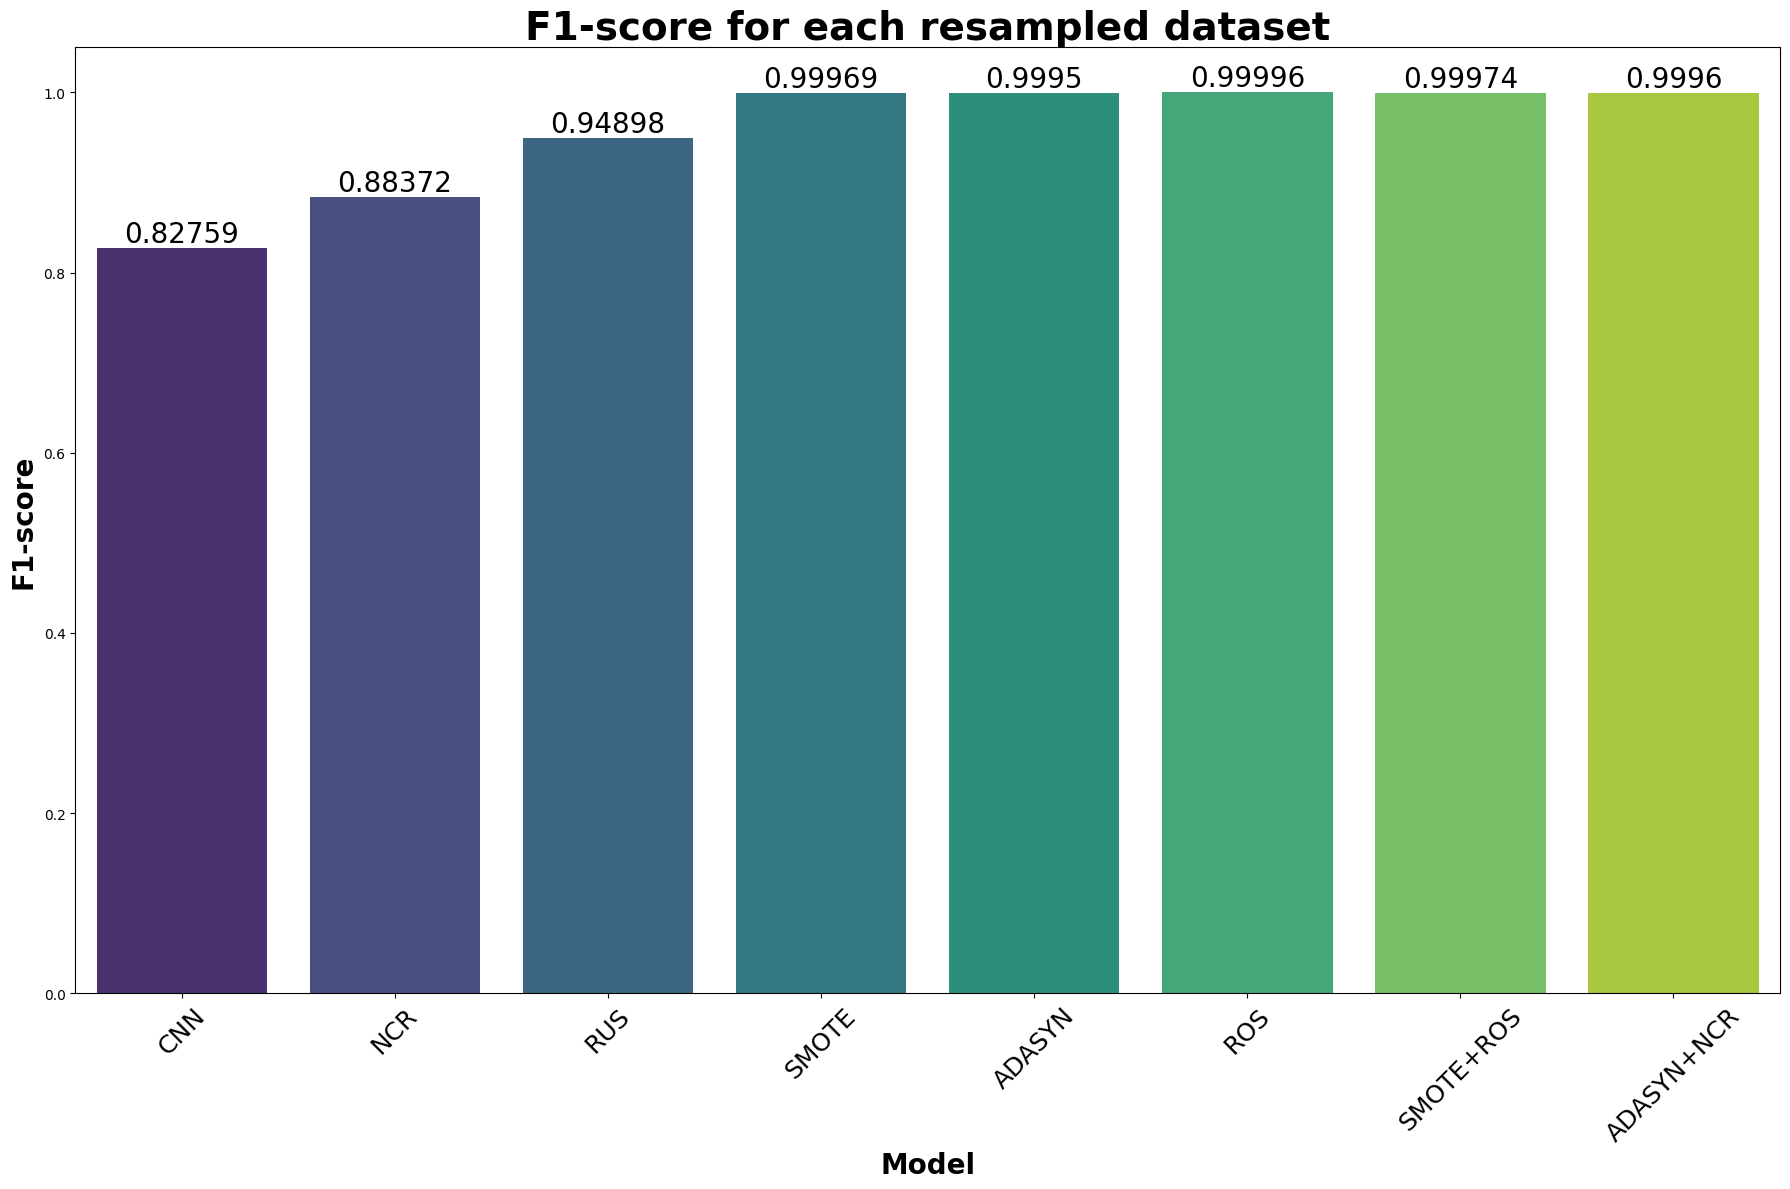

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
f1_scores = []

print("--- Testing Dataset ---")
print("-- Extreme Gradient Boosting --\n")
for name, x_tr, y_tr,x_ts,y_ts in List_x_y:
    print("Model fitting...")
    XGB.fit(x_tr, y_tr)
    print(f"Model fitted - {name}!\n")
    
    y_preds = XGB.predict(x_ts)

    cr = classification_report(y_ts, y_preds)
    f1_scores.append(f1_score(y_ts,y_preds))
    # _, _, f1, _ = precision_recall_fscore_support(y_test, XGB.predict(x_test), average='binary')
    # f1_scores.append(f1)

plt.figure(figsize=(18, 12))
sns.barplot(x=[name for name, _, _, _, _ in List_x_y], y=f1_scores, palette='viridis',hue=[name for name, _, _, _, _ in List_x_y])

plt.xlabel('Model', fontsize=20, fontweight='bold')
plt.ylabel('F1-score', fontsize=20, fontweight='bold')
plt.title('F1-score for each resampled dataset', fontsize=28, fontweight='bold')
plt.xticks(range(len(List_x_y)), [name for name, _, _, _, _ in List_x_y], fontsize=18,rotation=45)

for index, value in enumerate(f1_scores):
    plt.text(index, value, str(round(value, 5)), ha='center', va='bottom', fontsize=20)

plt.tight_layout()
plt.show()


--- Testing Dataset ---
-- Random Forest --

Model fitting...
Model fitted - CNN!

Model fitting...
Model fitted - NCR!

Model fitting...
Model fitted - RUS!

Model fitting...
Model fitted - SMOTE!

Model fitting...
Model fitted - ADASYN!

Model fitting...
Model fitted - ROS!

Model fitting...
Model fitted - SMOTE+ROS!

Model fitting...
Model fitted - ADASYN+NCR!



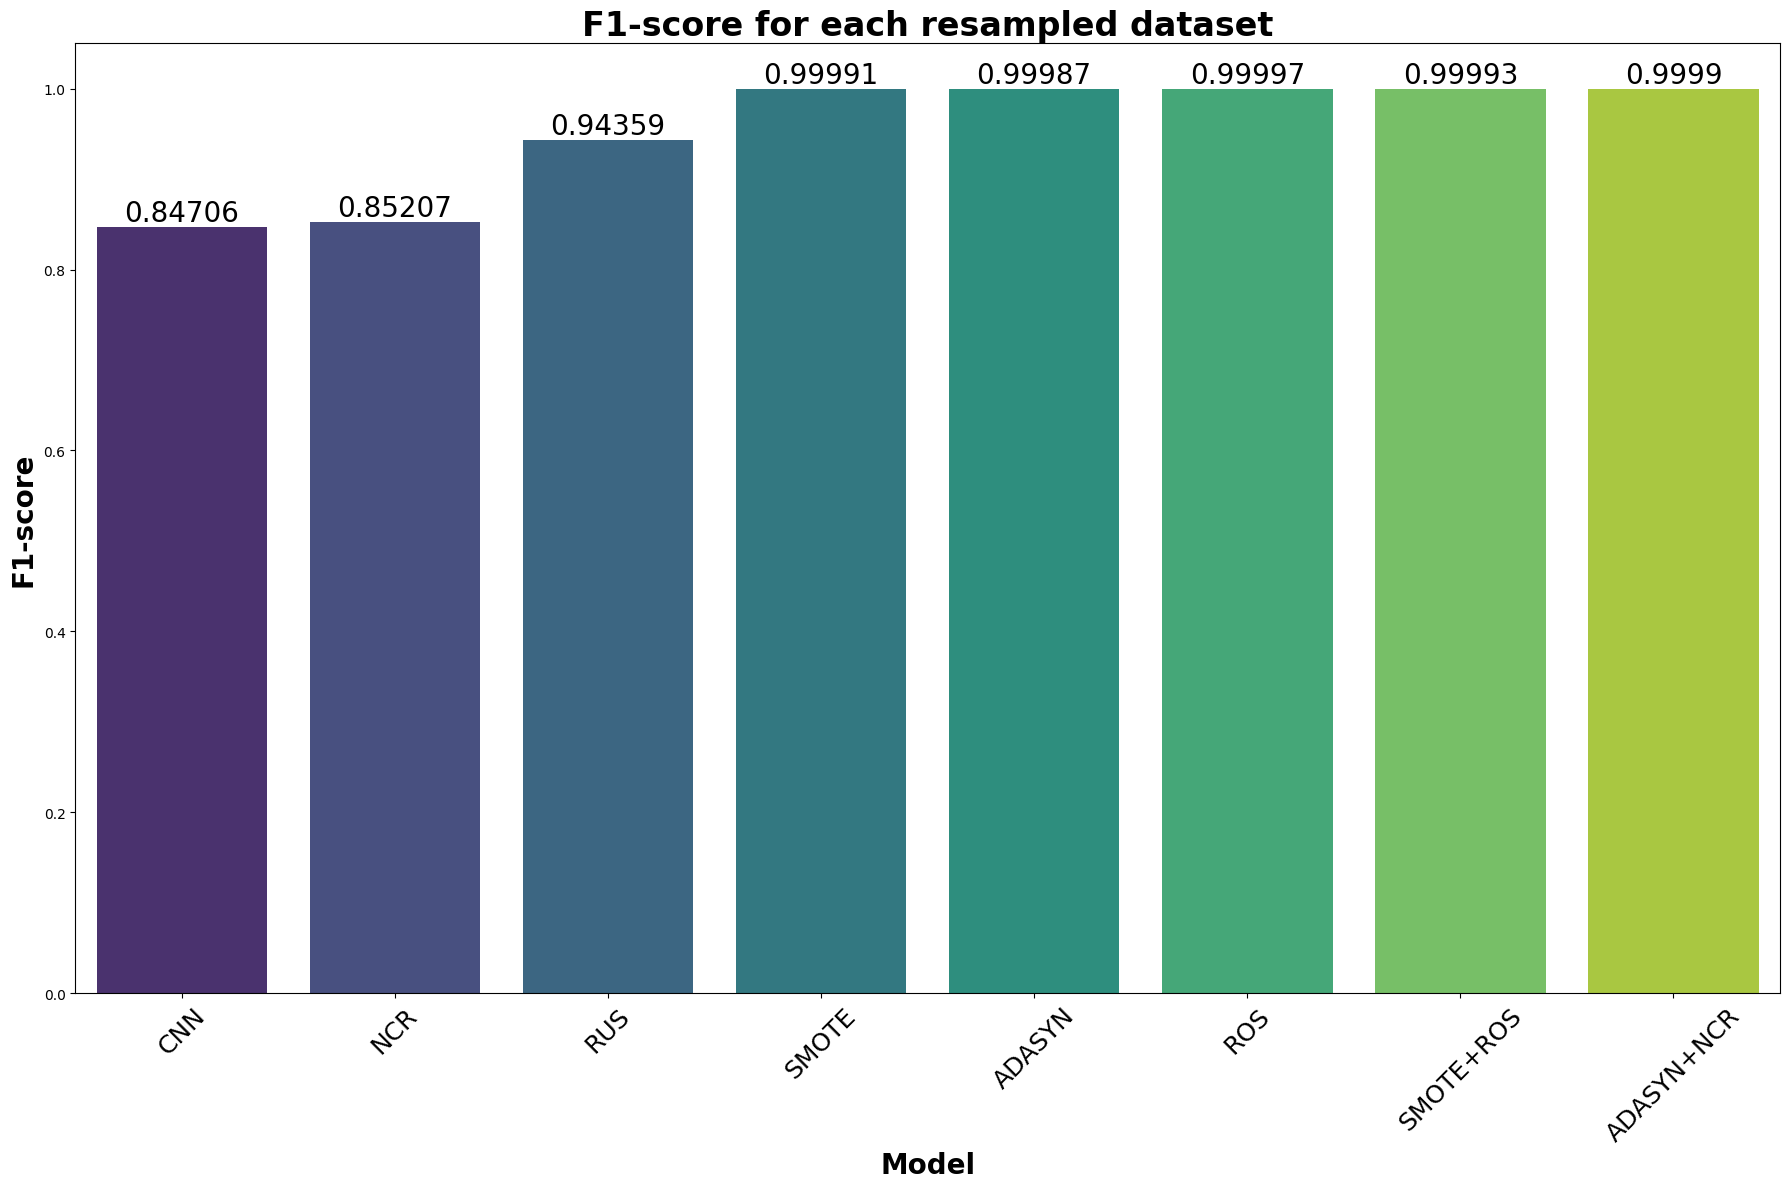

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

f1_scores = []

print("--- Testing Dataset ---")
print("-- Random Forest --\n")
for name, x_tr, y_tr, x_ts,y_ts in List_x_y:
    print("Model fitting...")
    RF.fit(x_tr, y_tr)
    print(f"Model fitted - {name}!\n")

    y_preds=RF.predict(x_ts)

    cr = classification_report(y_ts, y_preds)
    f1_scores.append(f1_score(y_ts,y_preds))
    
    # _, _, f1, _ = precision_recall_fscore_support(y_ts, y_preds)
    # f1_scores.append(f1)

# Membuat bar chart
plt.figure(figsize=(18, 12))
sns.barplot(x=[name for name, _, _, _, _ in List_x_y], y=f1_scores, palette='viridis',hue=[name for name, _, _, _, _ in List_x_y])

plt.xlabel('Model', fontsize=20, fontweight='bold')
plt.ylabel('F1-score', fontsize=20, fontweight='bold')
plt.title('F1-score for each resampled dataset', fontsize=24, fontweight='bold')
plt.xticks(range(len(List_x_y)), [name for name, _, _, _, _ in List_x_y], fontsize=18,rotation=45)

for index, value in enumerate(f1_scores):
    plt.text(index, value, str(round(value, 5)), ha='center', va='bottom', fontsize=20)

plt.tight_layout()
plt.show()
